In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal


In [7]:

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)



In [8]:

# Load datasets
benin = pd.read_csv("./../data/eda-benin.csv")
sierra = pd.read_csv("./../data/sierra_leone.csv")
togo = pd.read_csv("./../data/eda-togo.csv")


In [9]:
# Add country column
benin["country"] = "Benin"
sierra["country"] = "Sierra Leone"
togo["country"] = "Togo"


In [10]:
# Combine all datasets
df = pd.concat([benin, sierra, togo], ignore_index=True)

# Preview
print(df["country"].value_counts())
df.head()

country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


In [11]:
# Summary statistics grouped by country
summary = df.groupby("country")[["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb", "WS"]].agg(["mean", "median", "std"])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  230.555040    2.1  322.532347  151.258469    0.0  250.956962   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                           ModA  ...              \
                    mean median         std        mean  ...         std   
country                                                  ...               
Benin         115.358961    1.6  158.691074  236.589496  ...  326.894859   
Sierra Leone  116.444352    2.5  156.520714  226.144375  ...  317.346938   
Togo          116.444352    2.5  156.520714  226.144375  ...  317.346938   

                    ModB                          Tamb                   \
                    mean median         std       mean median       std   
country                                                                   
Benin         228.883576    4.3  316.536515  28.179683   28.0  5.924297   
Sierra Leone  219.568588    4.3  307.932510  27.751788   27.2  4.758023   
Togo          219.568588    4.3  307.932510  27.751788   27.2  4.758023   

                    WS                   
                  mean median       std  
country                                  
Benin         2.121113    1.9  1.603466  
Sierra Leone  2.368093    2.2  1.462668  
Togo          2.368093    2.2  1.462668  

[3 rows x 21 columns]

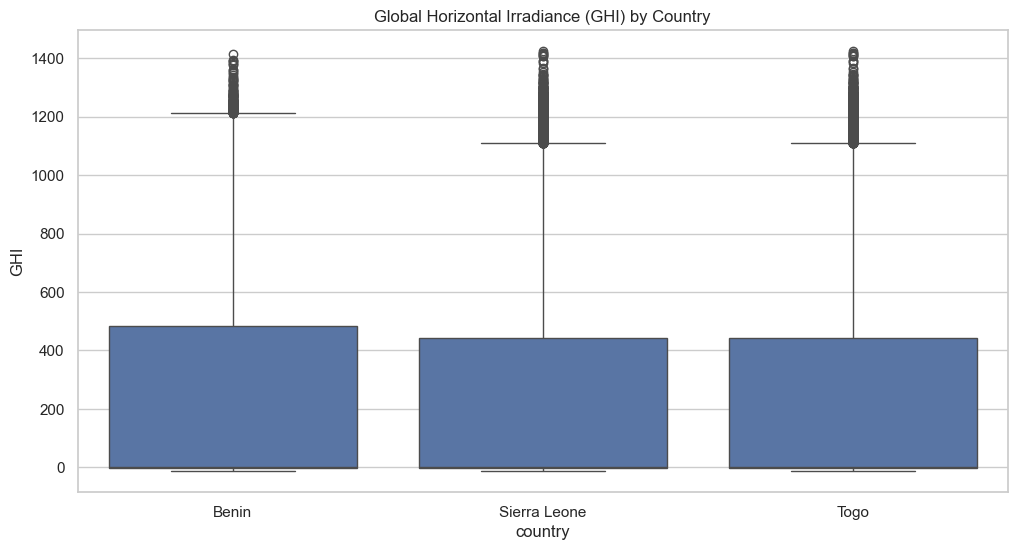

In [12]:
# Boxplot of GHI by country
sns.boxplot(x="country", y="GHI", data=df)
plt.title("Global Horizontal Irradiance (GHI) by Country")
plt.show()


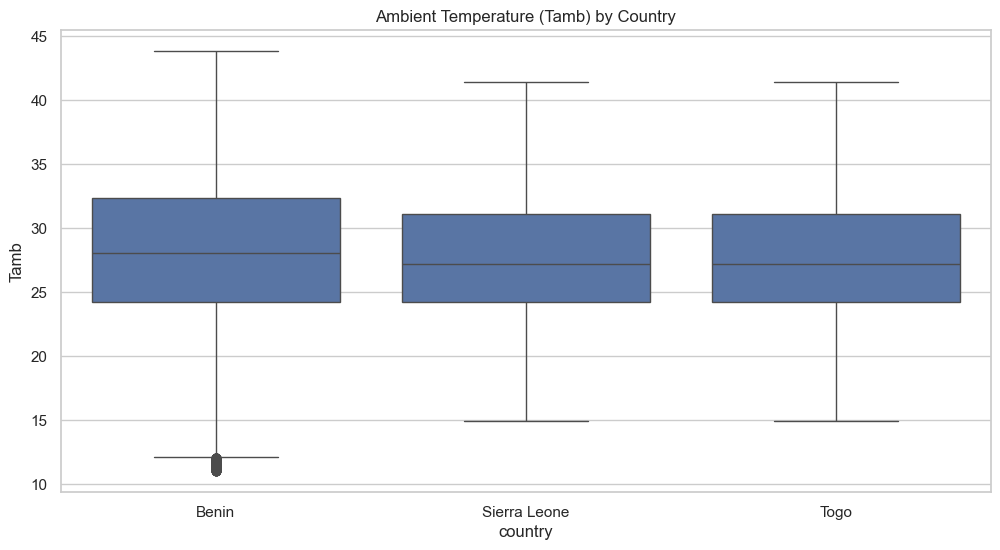

In [13]:

# Boxplot of Temperature
sns.boxplot(x="country", y="Tamb", data=df)
plt.title("Ambient Temperature (Tamb) by Country")
plt.show()


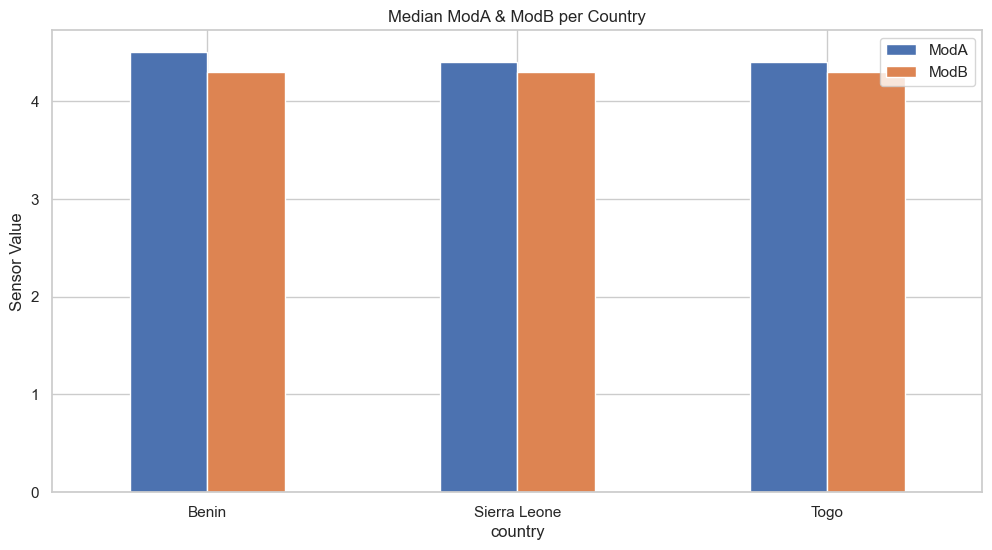

In [14]:
# Median ModA & ModB comparison
sensor_medians = df.groupby("country")[["ModA", "ModB"]].median().reset_index()
sensor_medians.plot(x="country", kind="bar", title="Median ModA & ModB per Country")
plt.xticks(rotation=0)
plt.ylabel("Sensor Value")
plt.show()


In [15]:
# Convert Timestamp
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")



In [16]:
# Resample by day per country
daily_avg = df.groupby(["country", df["Timestamp"].dt.date])[["GHI", "DNI", "Tamb"]].mean().reset_index()


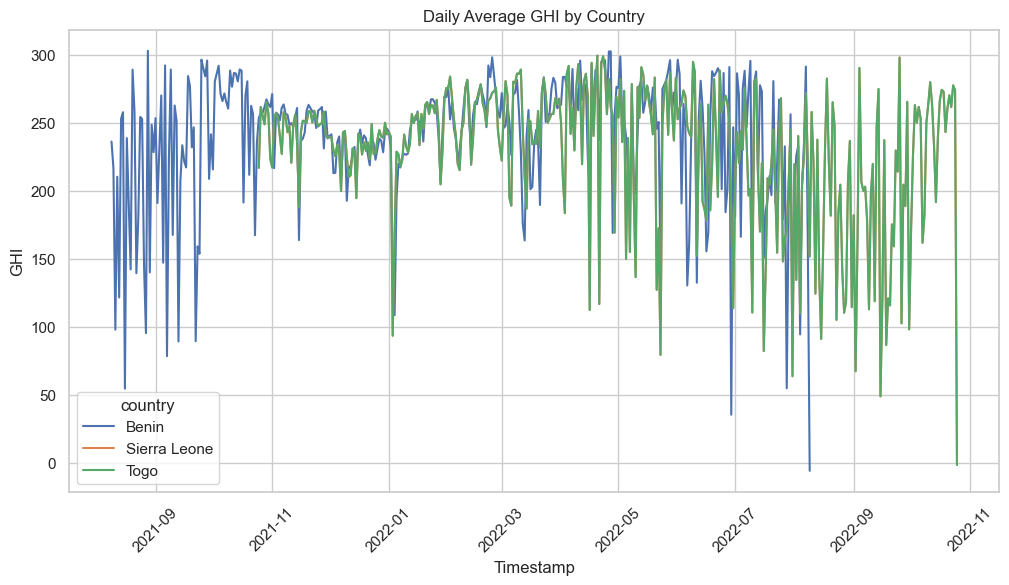

In [17]:

# Plot GHI over time by country
sns.lineplot(data=daily_avg, x="Timestamp", y="GHI", hue="country")
plt.title("Daily Average GHI by Country")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Prepare data
ghi_benin = benin["GHI"].dropna()
ghi_sierra = sierra["GHI"].dropna()
ghi_togo = togo["GHI"].dropna()

# ANOVA (for normal data) or Kruskal-Wallis (non-parametric)
anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print("ANOVA p-value:", anova_result.pvalue)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)


ANOVA p-value: 1.2454790398750157e-72
Kruskal-Wallis p-value: 1.0304390634487618e-24


### Statistical Test Results

To compare GHI distributions across Benin, Sierra Leone, and Togo, we ran:

- **ANOVA** to test for mean differences (assumes normality)
- **Kruskal-Wallis** for a non-parametric test (no normality assumption)

**Results:**
- ANOVA p-value: 1.25 × 10⁻⁷²
- Kruskal-Wallis p-value: 1.03 × 10⁻²⁴

**Interpretation:**
Both tests reject the null hypothesis of equal distributions across countries. Thus, **solar irradiance levels significantly differ** between Benin, Sierra Leone, and Togo.

This validates the need for **country-specific strategies** in solar energy planning and investment.
